The decision tree


Decision Tree Metrics:
Accuracy: 1.0
Confusion Matrix:
 [[54  0]
 [ 0 36]]


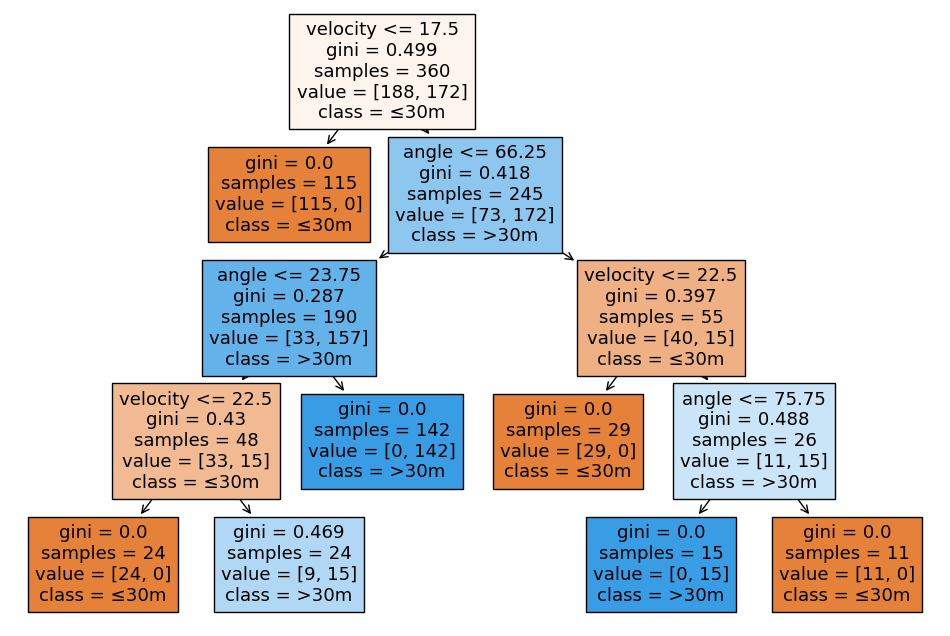

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import precision_score, recall_score, confusion_matrix, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

# Data 
g = 9.81
v0s = [15, 20, 25]
angles = np.arange(10, 85, 0.5)
data = [[v, theta, (v**2 * np.sin(2 * np.radians(theta))) / g] for v in v0s for theta in angles]
df = pd.DataFrame(data, columns=["velocity", "angle", "range"])

# Add binary target column
target_distance = 30  # Example target distance
df["exceeds_30m"] = (df["range"] > target_distance).astype(int)

# Classification task
X_clf = df[["velocity", "angle"]]
y_clf = df["exceeds_30m"]
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
clf_tree.fit(X_train_clf, y_train_clf)

# Evaluate
y_pred_tree = clf_tree.predict(X_test_clf)
print("\nDecision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_tree))

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(clf_tree, feature_names=X_clf.columns, class_names=["≤30m", ">30m"], filled=True)
plt.show()

In [ ]:
The KNeabors


KNN Metrics:
Accuracy: 1.0
Confusion Matrix:
 [[54  0]
 [ 0 36]]


/home/elhassen/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


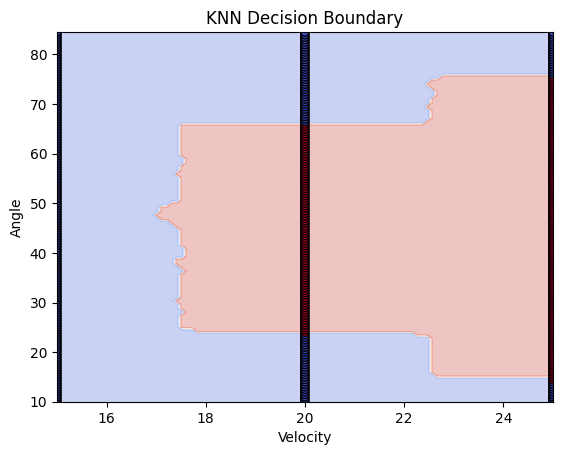

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train_clf, y_train_clf)

# Evaluate
y_pred_knn = clf_knn.predict(X_test_clf)
print("\nKNN Metrics:")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_knn))

# Visualize decision boundary (alternative method)
xx, yy = np.meshgrid(np.linspace(X_clf["velocity"].min(), X_clf["velocity"].max(), 100),
                     np.linspace(X_clf["angle"].min(), X_clf["angle"].max(), 100))
Z = clf_knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_clf["velocity"], X_clf["angle"], c=y_clf, cmap="coolwarm", edgecolor="k")
plt.xlabel("Velocity")
plt.ylabel("Angle")
plt.title("KNN Decision Boundary")
plt.show()

Hyperparameter Tuning with GridSearchCV

In [9]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Search for best parameters
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_clf, y_clf)

print("\nBest Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best CV Accuracy: 0.8377777777777778


Random Forest

Random Forest Accuracy: 0.9888888888888889


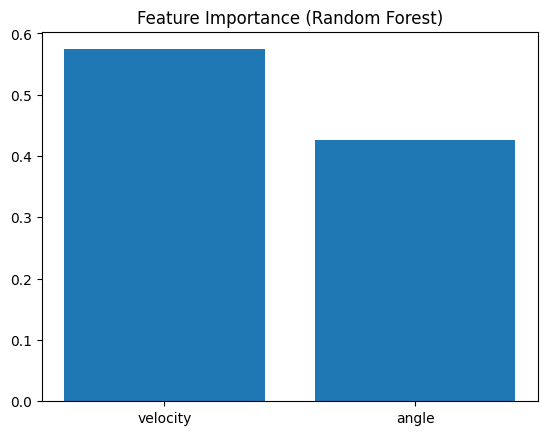

In [3]:
from sklearn.ensemble import RandomForestClassifier  

# Train a Random Forest  
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)  
rf_clf.fit(X_train_clf, y_train_clf)  

# Evaluate  
y_pred_rf = rf_clf.predict(X_test_clf)  
print("Random Forest Accuracy:", accuracy_score(y_test_clf, y_pred_rf))  

# Feature Importance (physics insights!)  
plt.bar(X_clf.columns, rf_clf.feature_importances_)  
plt.title("Feature Importance (Random Forest)")  
plt.show()  

Deploy Your Model as an API

In [5]:
# Save your best model  
from joblib import dump  
dump(rf_clf, "projectileM/projectile_model.joblib") 

['projectileM/projectile_model.joblib']